In [59]:
import pandas as pd
import seaborn as sns


In [60]:
df_microdados = pd.read_csv('MICRODADOS_ENEM_2023.csv', chunksize=3000000, sep=';', encoding='ISO-8859-1').get_chunk()
#df_microdados = pd.read_csv('MICRODADOS_ENEM_2023.csv', sep=';', encoding='ISO-8859-1')

In [61]:
df_microdados

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,210061988346,2023,1,M,0,1,1,3,0,1,...,B,A,B,B,A,B,D,A,B,B
2999996,210058149513,2023,8,M,1,1,1,1,6,1,...,A,A,A,B,A,A,B,A,B,B
2999997,210061400003,2023,2,F,1,1,1,2,0,2,...,B,A,B,B,A,A,C,A,B,B
2999998,210061659818,2023,3,F,1,2,1,2,0,2,...,A,A,A,B,A,A,E,A,A,B


In [62]:
#df_microdados.columns.values

In [63]:
selectedColumns = ['TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO']

In [64]:
selectedNotesColumns = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 
       'NU_NOTA_REDACAO']

In [65]:
df_selectedColumns = df_microdados.filter(items=selectedColumns)

In [66]:
df_data_count = df_selectedColumns.head(10000)

In [67]:
get_city = df_data_count['NO_MUNICIPIO_PROVA']
get_city.value_counts()

NO_MUNICIPIO_PROVA
Rio de Janeiro      361
São Paulo           324
Fortaleza           294
Salvador            240
Belém               218
                   ... 
Poconé                1
Corinto               1
Caravelas             1
Pontes e Lacerda      1
São Roque             1
Name: count, Length: 1353, dtype: int64

In [68]:
get_age = df_data_count['TP_FAIXA_ETARIA']

<Axes: >

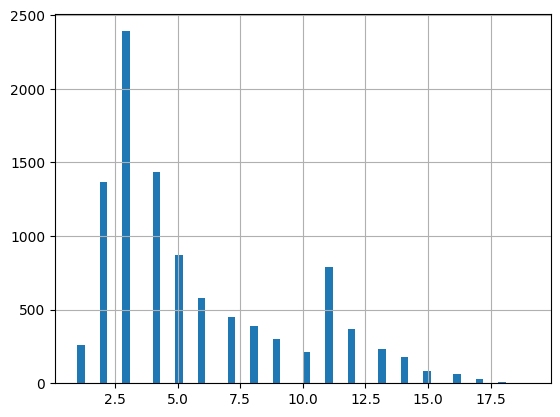

In [69]:
get_age.hist(bins=60)

In [70]:
df_data_count.corr(numeric_only=True)['NU_NOTA_MT']

TP_FAIXA_ETARIA          -0.100119
TP_ESTADO_CIVIL          -0.034136
TP_COR_RACA              -0.152901
TP_NACIONALIDADE         -0.025769
TP_ST_CONCLUSAO          -0.021112
TP_ANO_CONCLUIU           0.003818
TP_ESCOLA                 0.020306
TP_ENSINO                -0.010447
IN_TREINEIRO             -0.028706
CO_UF_ESC                 0.076265
TP_DEPENDENCIA_ADM_ESC   -0.000423
TP_LOCALIZACAO_ESC       -0.015584
TP_SIT_FUNC_ESC          -0.003243
CO_MUNICIPIO_PROVA        0.115349
CO_UF_PROVA               0.114408
TP_PRESENCA_CN                 NaN
TP_PRESENCA_CH            0.014571
TP_PRESENCA_LC            0.014571
TP_PRESENCA_MT                 NaN
CO_PROVA_CN              -0.007096
CO_PROVA_CH               0.000694
CO_PROVA_LC              -0.001615
CO_PROVA_MT              -0.007200
NU_NOTA_CN                0.664052
NU_NOTA_CH                0.610927
NU_NOTA_LC                0.602795
NU_NOTA_MT                1.000000
TP_STATUS_REDACAO        -0.112769
NU_NOTA_COMP1       

In [71]:
df_data_notes = df_microdados.filter(items=selectedNotesColumns)

<Axes: >

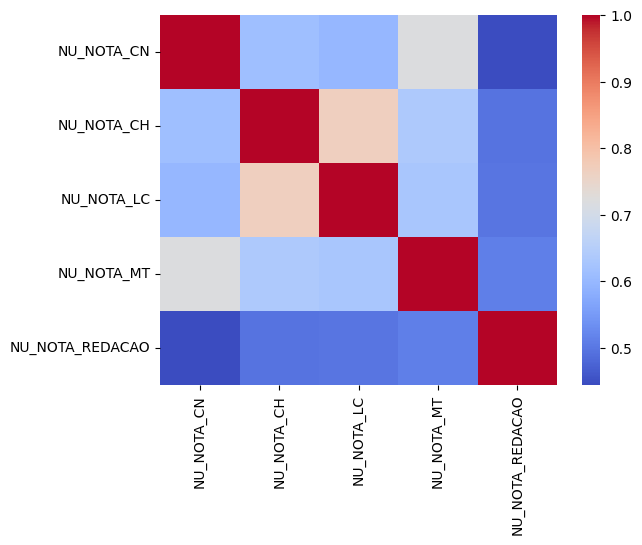

In [72]:
sns.heatmap(df_data_notes.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt=".2f")


<Axes: xlabel='TP_SEXO'>

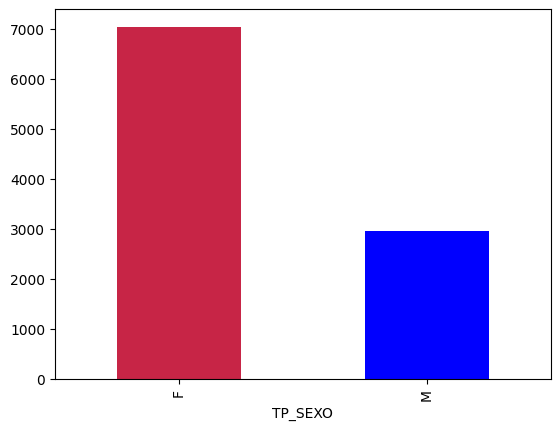

In [73]:
df_data_count['TP_SEXO'].value_counts().plot.bar(color=['#c72546', 'blue'])